<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
# %pip install seaborn
# import piplite

# await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
# Cleaned version of a publically available data set about used car sales
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
# from pyodide.http import pyfetch

# async def download(url, filename):
    # response = await pyfetch(url)
    # if response.status == 200:
        # with open(filename, "wb") as f:
            # f.write(await response.bytes())

# path = URL

# await download(path, "dataset.csv")

---


# Test Environment


### Record of prompts used:
1. Write a python code to perform the following actions.
   * Import a data set from a URL, The headers for the data set must be in the first row of the CSV file.
   * Generate the statistical description of all the features used in the data set. Include "object" data types as well.

2. Write a Python code to perform the following actions.
   * Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
   * Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".
  
3. Write a Python code for the following.
   * Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
   * Don't include the values evaluated for target variable against itself.
   * Print these values as a part of a single dataframe against each individual attrubute.
  
4. Write a python code that performs the following actions.
   * Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
   * Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
   * Plot a pcolor plot for this pivot table.

## Data Collection & Descriptive Statistics

In [6]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

# 1. Import the dataset from the provided URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
data = pd.read_csv(url)

# 2. Generate the statistical description of all the features
description = data.describe(include='all')

description

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238,238.000000,238,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
unique,NaN,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,118.500000,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


## Visualization of Features vs Price

C:\Users\Duh1218.000\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


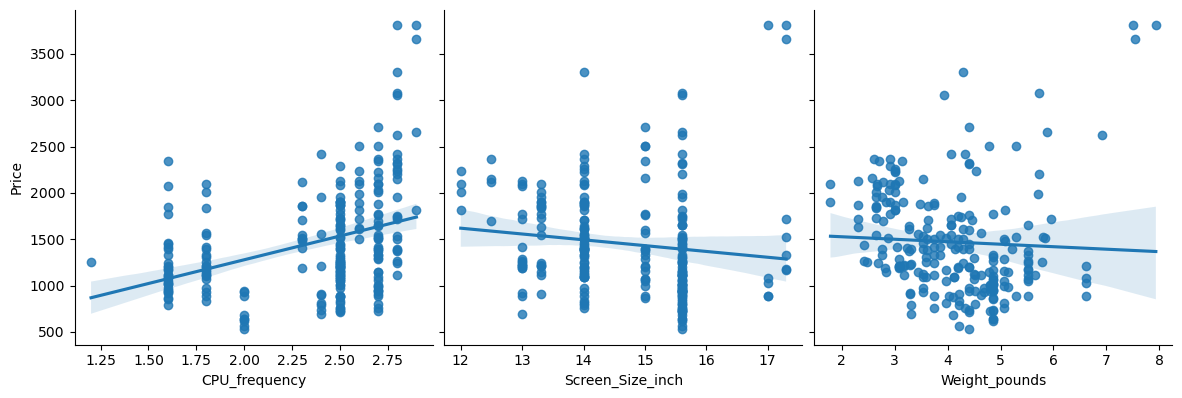

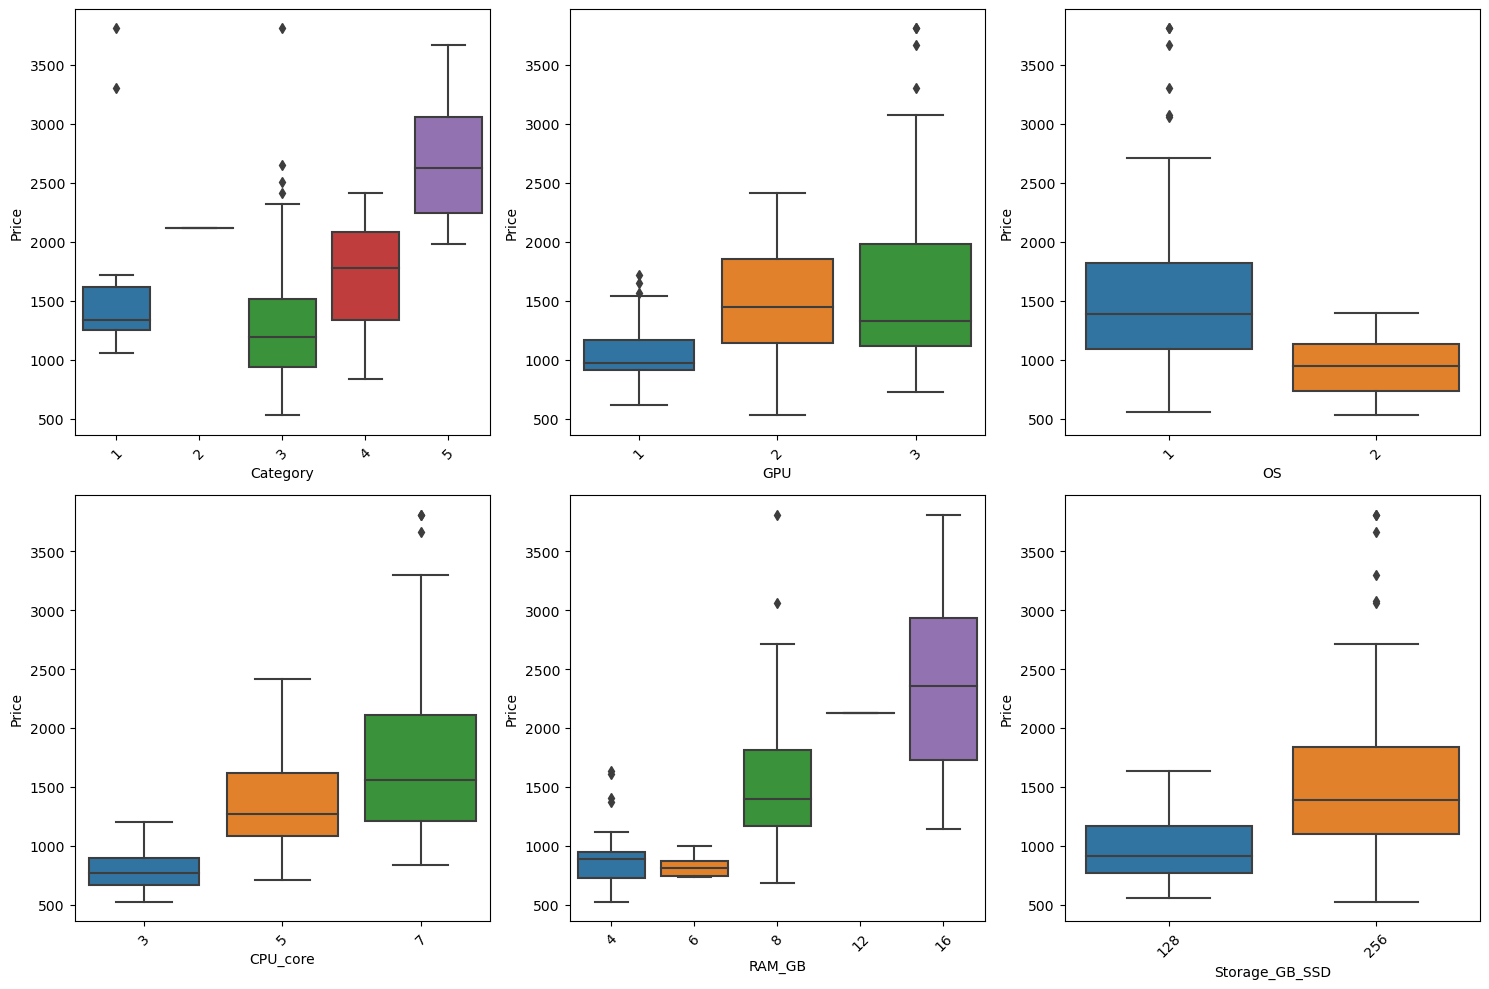

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert weight from kg to pounds
data['Weight_pounds'] = data['Weight_kg'] * 2.20462
data['Screen_Size_inch'] = data['Screen_Size_cm'] / 2.54

# Regression plots for specified attributes against 'Price'
sns.pairplot(data, x_vars=["CPU_frequency", "Screen_Size_inch", "Weight_pounds"], y_vars="Price", kind="reg", height=4)
plt.show()

# Box plots for specified attributes against 'Price'
plt.figure(figsize=(15, 10))

# Category vs Price
plt.subplot(2, 3, 1)
sns.boxplot(x='Category', y='Price', data=data)
plt.xticks(rotation=45)

# GPU vs Price
plt.subplot(2, 3, 2)
sns.boxplot(x='GPU', y='Price', data=data)
plt.xticks(rotation=45)

# OS vs Price
plt.subplot(2, 3, 3)
sns.boxplot(x='OS', y='Price', data=data)
plt.xticks(rotation=45)

# CPU_core vs Price
plt.subplot(2, 3, 4)
sns.boxplot(x='CPU_core', y='Price', data=data)
plt.xticks(rotation=45)

# RAM_GB vs Price
plt.subplot(2, 3, 5)
sns.boxplot(x='RAM_GB', y='Price', data=data)
plt.xticks(rotation=45)

# Storage_GB_SSD vs Price
plt.subplot(2, 3, 6)
sns.boxplot(x='Storage_GB_SSD', y='Price', data=data)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Correlation of Features with Price

In [33]:
from scipy.stats import pearsonr
import numpy as np

# List of numerical attributes to evaluate (excluding 'Price' itself)
numerical_attributes = data.select_dtypes(include=['number']).columns.drop('Price')

# Initialize lists to store the results
correlation_values = []
pearson_coefficients = []
p_values = []

# Evaluate correlation, Pearson coefficient, and p-value for each attribute against 'Price'
for attribute in numerical_attributes:
    # Drop rows with NaN or inf values in the columns of interest
    valid_data = data[[attribute, 'Price']].dropna()
    valid_data = valid_data[np.isfinite(valid_data).all(1)]

    if len(valid_data) > 0:  # Ensure there is enough data left to calculate
        # Correlation value
        correlation = valid_data[attribute].corr(valid_data['Price'])
        correlation_values.append(correlation)

        # Pearson coefficient and p-value
        pearson_coef, p_val = pearsonr(valid_data[attribute], valid_data['Price'])
        pearson_coefficients.append(pearson_coef)
        p_values.append(p_val)
    else:
        # If data is insufficient, append NaN or None
        correlation_values.append(np.nan)
        pearson_coefficients.append(np.nan)
        p_values.append(np.nan)

# Create a dataframe to display the results
results_df = pd.DataFrame({
    'Attribute': numerical_attributes,
    'Correlation Value': correlation_values,
    'Pearson Coefficient': pearson_coefficients,
    'P-Value': p_values
})

# Display the results dataframe
print(results_df)

           Attribute  Correlation Value  Pearson Coefficient       P-Value
0         Unnamed: 0           0.321933             0.321933  3.851058e-07
1           Category           0.286243             0.286243  7.225696e-06
2                GPU           0.288298             0.288298  6.166950e-06
3                 OS          -0.221730            -0.221730  5.696643e-04
4           CPU_core           0.459398             0.459398  7.912950e-14
5     Screen_Size_cm          -0.128233            -0.128233  5.009166e-02
6      CPU_frequency           0.366666             0.366666  5.502463e-09
7             RAM_GB           0.549297             0.549297  3.681561e-20
8     Storage_GB_SSD           0.243421             0.243421  1.489892e-04
9          Weight_kg          -0.050707            -0.050707  4.410942e-01
10     Weight_pounds          -0.050707            -0.050707  4.410942e-01
11  Screen_Size_inch          -0.128233            -0.128233  5.009166e-02


## Pivot & Visualization of Features with Price

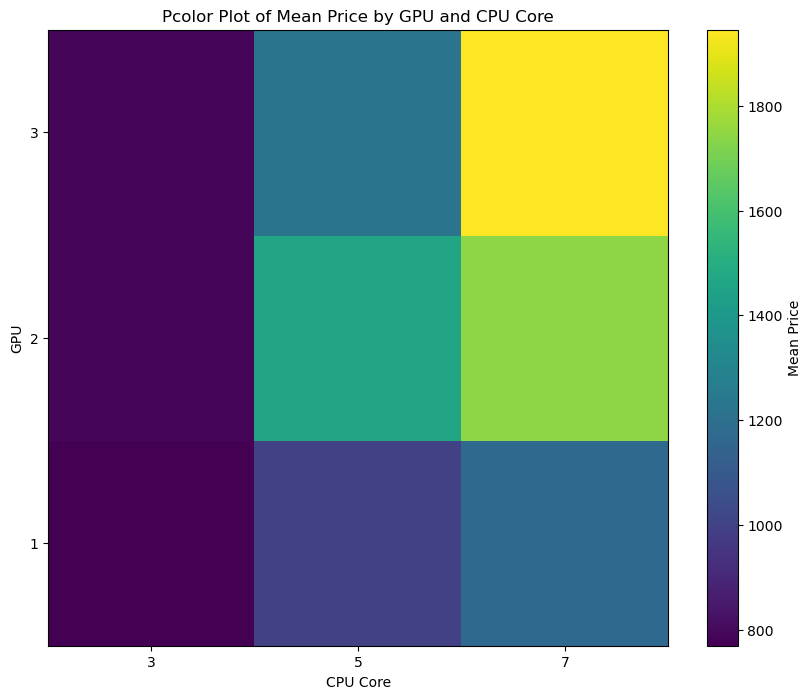

In [45]:
# Select relevant columns and handle missing values
df = data[['GPU', 'CPU_core', 'Price']].dropna()

# Create a pivot table with 'GPU' and 'CPU_core' as indices and 'Price' as values
pivot_table = df.pivot_table(index='GPU', columns='CPU_core', values='Price', aggfunc='mean')

# Plot a pcolor plot for the pivot table
plt.figure(figsize=(10, 8))
plt.pcolor(pivot_table, cmap='viridis', shading='auto')

# Add color bar
plt.colorbar(label='Mean Price')

# Set axis labels
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.title('Pcolor Plot of Mean Price by GPU and CPU Core')

# Set x and y axis ticks to match the pivot table indices
plt.xticks(ticks=np.arange(0.5, len(pivot_table.columns), 1), labels=pivot_table.columns)
plt.yticks(ticks=np.arange(0.5, len(pivot_table.index), 1), labels=pivot_table.index)

plt.show()

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
